<a href="https://colab.research.google.com/github/roklp/MLP34/blob/main/240201_api_crawling_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
SERVICE_KEY = '/content/drive/MyDrive/API/seoul.txt'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
URL = f'http://openapi.seoul.go.kr:8088/{SERVICE_KEY}/json/tbLnOpendataRtmsV/1/10/'
URL

'http://openapi.seoul.go.kr:8088//content/drive/MyDrive/API/seoul.txt/json/tbLnOpendataRtmsV/1/10/'

In [ ]:
import requests
import json
import pandas as pd

req = requests.get(URL)
req

<Response [200]>

In [ ]:
content = req.json()
#content

result = pd.DataFrame(content['tbLnOpendataRtmsV']['row'])
result

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [ ]:
URL = f'http://openapi.seoul.go.kr:8088/{SERVICE_KEY}/xml/tbLnOpendataRtmsV/1/10/'
URL

'http://openapi.seoul.go.kr:8088//content/drive/MyDrive/API/seoul.txt/xml/tbLnOpendataRtmsV/1/10/'

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

SERVICE_KEY = '/content/drive/MyDrive/API/seoul.txt'
URL = f'http://openapi.seoul.go.kr:8088/{SERVICE_KEY}/xml/tbLnOpendataRtmsV/1/10/'

req = requests.get(URL)
soup = BeautifulSoup(req.content, 'lxml')
#print(soup.prettify())

years            = soup.find_all('acc_year')         # 접수년월
sgg_cds          = soup.find_all('sgg_cd')           # 자치구코드
sgg_nms          = soup.find_all('sgg_nm')           # 자치구명
bjdong_cds       = soup.find_all('bjdong_cd')        # 법정동코드
bjdong_nms       = soup.find_all('bjdong_nm')        # 법정동명
land_gbns        = soup.find_all('land_gbn')         # 지번구분
land_gbn_nms     = soup.find_all('land_gbn_nm')      # 지번구분명
land_gbn_nms     = soup.find_all('land_gbn_nm')      # 지번구분명
bonbeons         = soup.find_all('bonbeon')          # 본번
bubeons          = soup.find_all('bubeon')           # 부번
bldg_nms         = soup.find_all('bldg_nm')          # 건물명
deal_ymds        = soup.find_all('deal_ymd')         # 계약일
obj_amts         = soup.find_all('obj_amt')          # 물건금액(만원)
bldg_areas       = soup.find_all('bldg_area')        # 건물면적(㎡)
tot_areas        = soup.find_all('tot_area')         # 토지면적(㎡)
floors           = soup.find_all('floor')            # 층
right_gbns       = soup.find_all('right_gbn')        # 권리구분
cntl_ymds        = soup.find_all('cntl_ymd')         # 취소일
build_years      = soup.find_all('build_years')      # 건축년도
house_types      = soup.find_all('house_type')       # 건물용도
req_gbn          = soup.find_all('req_gbn')          # 신고구분
rdealer_lawdnms  = soup.find_all('rdealer_lawdnm')   # 신고한 개업공인중개사 시군구명
year_list           = []
sgg_cd_list         = []
bldg_nm_list        = []
obj_amt_list        = []
house_type_list     = []
rdealer_lawdnm_list = []
for year, sgg_cd, bldg_nm, obj_amt, house_type, rdealer_lawdnm in zip(years, sgg_cds, bldg_nms, obj_amts, house_types, rdealer_lawdnms):
  year_list.append(year.get_text())
  sgg_cd_list.append(sgg_cd.get_text())
  bldg_nm_list.append(bldg_nm.get_text())
  obj_amt_list.append(obj_amt.get_text())
  house_type_list.append(house_type.get_text())
  rdealer_lawdnm_list.append(rdealer_lawdnm.get_text())
df = pd.DataFrame({
    "acc_year": year_list,
    "sgg_cd": sgg_cd_list,
    "bldg_nm" : bldg_nm_list,
    "obj_amt": obj_amt_list,
    "house_type" : house_type_list,
    "rdealer_lawdnm": rdealer_lawdnm_list
})
df

,acc_year,sgg_cd,bldg_nm,obj_amt,house_type,rdealer_lawdnm


## 공공데이터 포털
- 국토교통부

In [ ]:
PUBLIC_SERVICE_KEY = '/content/drive/MyDrive/API/gong.txt'

serviceKey = '인증키 입력'
pageNo = 1 # 페이지 번호
numOfRows = 500 # 한 페이지 결과수
LAWD_CD = 11500 # 지역코드
DEAL_YMD = 202101 # 계약월
url = f'http://openapi.molit.go.kr/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTradeDev?serviceKey={PUBLIC_SERVICE_KEY}&pageNo={pageNo}&numOfRows={numOfRows}&LAWD_CD={LAWD_CD}&DEAL_YMD={DEAL_YMD}'
req = requests.get(url)
req

<Response [200]>

In [ ]:
import requests
import json
import pandas as pd
import xmltodict
PUBLIC_SERVICE_KEY = '/content/drive/MyDrive/API/gong.txt'
# serviceKey = '인증키 입력'
pageNo = 1 # 페이지 번호
numOfRows = 500 # 한 페이지 결과수
LAWD_CD = 11500 # 지역코드
DEAL_YMD = 202101 # 계약월
url = f'http://openapi.molit.go.kr/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTradeDev?serviceKey={PUBLIC_SERVICE_KEY}&pageNo={pageNo}&numOfRows={numOfRows}&LAWD_CD={LAWD_CD}&DEAL_YMD={DEAL_YMD}'
req = requests.get(url)
# req.text
contents = xmltodict.parse(req.text)
data = pd.DataFrame(contents['response']['body']['items']['item'])
data.head()

ModuleNotFoundError: No module named 'xmltodict'

In [ ]:
SERVICE_KEY = '/content/drive/MyDrive/API/seoul.txt'

#URL = f'http://openapi.seoul.go.kr:8088/{SERVICE_KEY}/json/tbLnOpendataRtmsV/1/1000/'
#URL = f'http://openapi.seoul.go.kr:8088/{SERVICE_KEY}/json/tbLnOpendataRtmsV/1001/2000/'
#URL = f'http://openapi.seoul.go.kr:8088/{SERVICE_KEY}/json/tbLnOpendataRtmsV/2001/3000/'


for i in range(1, 10):
    URL = f'http://openapi.seoul.go.kr:8088/{SERVICE_KEY}/json/tbLnOpendataRtmsV/{1 + (i-1) * 1000}/{i * 1000}/'
    print(URL)

http://openapi.seoul.go.kr:8088/51774a5144726f6b3434444a4b4364/json/tbLnOpendataRtmsV/1/1000/
http://openapi.seoul.go.kr:8088/51774a5144726f6b3434444a4b4364/json/tbLnOpendataRtmsV/1001/2000/
http://openapi.seoul.go.kr:8088/51774a5144726f6b3434444a4b4364/json/tbLnOpendataRtmsV/2001/3000/
http://openapi.seoul.go.kr:8088/51774a5144726f6b3434444a4b4364/json/tbLnOpendataRtmsV/3001/4000/
http://openapi.seoul.go.kr:8088/51774a5144726f6b3434444a4b4364/json/tbLnOpendataRtmsV/4001/5000/
http://openapi.seoul.go.kr:8088/51774a5144726f6b3434444a4b4364/json/tbLnOpendataRtmsV/5001/6000/
http://openapi.seoul.go.kr:8088/51774a5144726f6b3434444a4b4364/json/tbLnOpendataRtmsV/6001/7000/
http://openapi.seoul.go.kr:8088/51774a5144726f6b3434444a4b4364/json/tbLnOpendataRtmsV/7001/8000/
http://openapi.seoul.go.kr:8088/51774a5144726f6b3434444a4b4364/json/tbLnOpendataRtmsV/8001/9000/


In [ ]:
import requests
import pandas as pd

# 서비스 키 파일 경로
SERVICE_KEY_PATH = '/content/drive/MyDrive/API/seoul.txt'

# 서비스 키 파일 읽어오기
with open(SERVICE_KEY_PATH, 'r') as key_file:
    SERVICE_KEY = key_file.read().strip()

# 데이터 프레임 초기화
data = None

# 페이지별로 데이터 가져오기
for j in range(1, 5):
    url = f'http://openapi.seoul.go.kr:8088/{SERVICE_KEY}/json/tbLnOpendataRtmsV/{1 + ((j - 1) * 1000)}/{j * 1000}'
    print(url)

    req = requests.get(url)

    # 에러 체크
    if req.status_code != 200:
        print(f"Error {req.status_code} occurred. Check your request.")
        break

    content = req.json()

    # 'tbLnOpendataRtmsV' 키 확인
    if 'tbLnOpendataRtmsV' in content:
        con = content['tbLnOpendataRtmsV']['row']
        result = pd.DataFrame(con)

        # 데이터 프레임 연결
        data = pd.concat([data, result], ignore_index=True)

gangnam_data = data[data['SGG_NM'] == '강남구']

# 결과 출력
gangnam_data.head()


data.head()


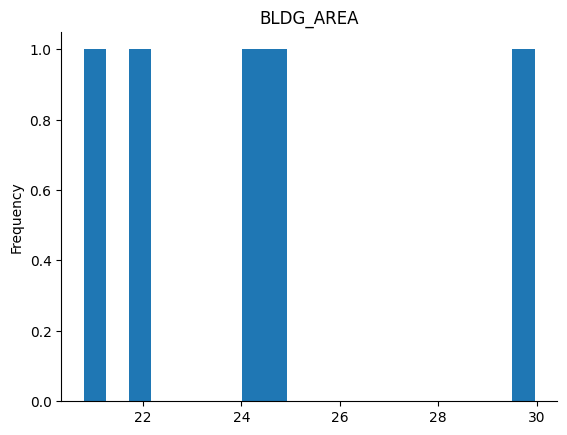

In [ ]:
from matplotlib import pyplot as plt
_df_0['BLDG_AREA'].plot(kind='hist', bins=20, title='BLDG_AREA')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
print(data.columns)


Index(['ACC_YEAR', 'SGG_CD', 'SGG_NM', 'BJDONG_CD', 'BJDONG_NM', 'LAND_GBN',
       'LAND_GBN_NM', 'BONBEON', 'BUBEON', 'BLDG_NM', 'DEAL_YMD', 'OBJ_AMT',
       'BLDG_AREA', 'TOT_AREA', 'FLOOR', 'RIGHT_GBN', 'CNTL_YMD', 'BUILD_YEAR',
       'HOUSE_TYPE', 'REQ_GBN', 'RDEALER_LAWDNM'],
      dtype='object')


In [ ]:
data

,ACC_YEAR,SGG_CD,SGG_NM,BJDONG_CD,BJDONG_NM,LAND_GBN,LAND_GBN_NM,BONBEON,BUBEON,BLDG_NM,...,OBJ_AMT,BLDG_AREA,TOT_AREA,FLOOR,RIGHT_GBN,CNTL_YMD,BUILD_YEAR,HOUSE_TYPE,REQ_GBN,RDEALER_LAWDNM
0,2024,11560,영등포구,10200,영등포동1가,1,대지,0121,0005,여의도리슈빌DS,...,20600,21.41,31.43,7.0,,,2020,오피스텔,중개거래,서울 영등포구
1,2024,11740,강동구,10900,천호동,1,대지,0090,0002,도우빌라,...,36700,48.69,46.66,-1.0,,,1991,연립다세대,중개거래,서울 강동구
2,2024,11320,도봉구,10800,도봉동,1,대지,0051,0012,중흥에스-클래스,...,55000,85.00,0.00,3.0,,,2004,아파트,중개거래,서울 도봉구
3,2024,11545,금천구,10200,독산동,1,대지,1006,0115,중앙하이빌1동2동,...,23000,28.68,14.88,4.0,,,2016,연립다세대,직거래,
4,2024,11590,동작구,10300,상도1동,1,대지,0419,0003,종로빌리지,...,40000,69.13,48.37,3.0,,,1991,연립다세대,중개거래,서울 강남구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,2023,11290,성북구,13900,석관동,1,대지,0073,0014,(73-14),...,29000,28.49,20.41,5.0,,,2023,연립다세대,중개거래,서울 성북구
3996,2023,11440,마포구,10500,용강동,1,대지,0502,0000,래미안마포리버웰,...,170000,84.97,0.00,3.0,,,2015,아파트,중개거래,"서울 마포구, 서울 성동구"
3997,2023,11680,강남구,10600,대치동,1,대지,1014,0003,대치삼성,...,271000,97.35,0.00,17.0,,,2000,아파트,중개거래,"서울 강남구, 서울 금천구"
3998,2024,11200,성동구,11300,옥수동,1,대지,0561,0000,래미안 옥수 리버젠,...,220000,113.52,0.00,13.0,,,2012,아파트,중개거래,서울 성동구


In [ ]:
pip install python-dotenv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

/content/drive/MyDrive/API/gong.txt

Mounted at /content/drive


In [ ]:
api_key_path = '/content/drive/MyDrive/API/seoul.txt'  # 파일 경로를 적절히 변경
with open(api_key_path) as f:
    api_key = f.read().strip()


In [ ]:
import requests
import pandas as pd


SERVICE_KEY_PATH = '/content/drive/MyDrive/API/seoul.txt'


with open(SERVICE_KEY_PATH, 'r') as key_file:
    SERVICE_KEY = key_file.read().strip()


data = None


page_size = 1000
page_count = 5000

for page_number in range(1, page_count + 1):
    url = f'http://openapi.seoul.go.kr:8088/{SERVICE_KEY}/json/tbLnOpendataRtmsV/{(page_number - 1) * page_size + 1}/{page_number * page_size}/2023/2024/11680'  # 강남구 코드: 11680
    print(url)

    req = requests.get(url)


    if req.status_code != 200:
        print(f"Error {req.status_code} occurred. Check your request.")
        break

    content = req.json()


    if 'tbLnOpendataRtmsV' in content:
        con = content['tbLnOpendataRtmsV']['row']
        result = pd.DataFrame(con)


        data = pd.concat([data, result], ignore_index=True)


data = data.sort_values(by='OBJ_AMT', ascending=False)

data.head()


In [ ]:
data

,ACC_YEAR,SGG_CD,SGG_NM,BJDONG_CD,BJDONG_NM,LAND_GBN,LAND_GBN_NM,BONBEON,BUBEON,BLDG_NM,...,OBJ_AMT,BLDG_AREA,TOT_AREA,FLOOR,RIGHT_GBN,CNTL_YMD,BUILD_YEAR,HOUSE_TYPE,REQ_GBN,RDEALER_LAWDNM
2951,2023,11680,강남구,11400,일원동,1,대지,0711,0000,수서,...,99800,52.29,0.00,4.0,,,1992,아파트,중개거래,서울 강남구
1306,2023,11680,강남구,11800,도곡동,1,대지,0467,0000,타워팰리스1,...,990000,301.47,0.00,55.0,,,2002,아파트,중개거래,서울 강남구
1500,2023,11680,강남구,10300,개포동,1,대지,0012,0000,성원대치2단지아파트,...,99000,33.18,0.00,9.0,,,1992,아파트,중개거래,서울 강남구
1141,2023,11680,강남구,10300,개포동,1,대지,0012,0000,성원대치2단지아파트,...,99000,33.18,0.00,5.0,,,1992,아파트,중개거래,서울 강남구
1443,2023,11680,강남구,10300,개포동,1,대지,0012,0000,성원대치2단지아파트,...,98500,33.18,0.00,14.0,,,1992,아파트,중개거래,서울 강남구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2023,11680,강남구,11400,일원동,1,대지,0711,0000,수서,...,100000,49.68,0.00,4.0,,,1992,아파트,중개거래,서울 강남구
122,2023,11680,강남구,10600,대치동,1,대지,0914,0008,대치타워,...,100000,81.24,0.00,3.0,,,2003,아파트,중개거래,서울 강남구
2284,2023,11680,강남구,10100,역삼동,1,대지,0775,0015,현대하이츠,...,100000,111.96,0.00,3.0,,,2004,아파트,중개거래,서울 강남구
1315,2023,11680,강남구,11500,수서동,1,대지,0736,0000,신동아,...,100000,39.53,0.00,15.0,,,1992,아파트,중개거래,서울 강남구


In [ ]:
import requests
import pandas as pd


SERVICE_KEY_PATH = '/content/drive/MyDrive/API/seoul.txt'


with open(SERVICE_KEY_PATH, 'r') as key_file:
    SERVICE_KEY = key_file.read().strip()


data = None


page_size = 1000
page_number = 11

url = f'http://openapi.seoul.go.kr:8088/{SERVICE_KEY}/json/tbLnOpendataRtmsV/{(page_number - 1) * page_size + 1}/{page_number * page_size}'

req = requests.get(url)


if req.status_code == 200:
    content = req.json()


    if 'tbLnOpendataRtmsV' in content:
        con = content['tbLnOpendataRtmsV']['row']
        result = pd.DataFrame(con)

        data = pd.concat([data, result], ignore_index=True)


data.to_csv('/content/drive/MyDrive/data/seoul_data.csv', index=False)



data.head()


,ACC_YEAR,SGG_CD,SGG_NM,BJDONG_CD,BJDONG_NM,LAND_GBN,LAND_GBN_NM,BONBEON,BUBEON,BLDG_NM,...,OBJ_AMT,BLDG_AREA,TOT_AREA,FLOOR,RIGHT_GBN,CNTL_YMD,BUILD_YEAR,HOUSE_TYPE,REQ_GBN,RDEALER_LAWDNM
0,2023,11140,중구,16500,황학동,1,대지,2545,0000,롯데캐슬,...,84000,59.94,0.00,22.0,,20231222,2008,아파트,중개거래,서울 중구
1,2023,11680,강남구,10600,대치동,1,대지,1014,0003,대치삼성,...,120000,59.88,0.00,3.0,,,2000,아파트,중개거래,서울 강남구
2,2023,11305,강북구,10200,번동,1,대지,0523,0003,라온팰리스,...,47000,57.08,46.15,4.0,,,2022,연립다세대,직거래,
3,2023,11680,강남구,10300,개포동,1,대지,1219,0010,새롬그린빌,...,54000,56.79,28.50,1.0,,,1995,연립다세대,중개거래,"경기 안양동안구, 서울 강남구"
4,2023,11290,성북구,13300,정릉동,1,대지,0716,0130,서광빌라나동(716-130),...,15500,50.34,34.60,3.0,,,1991,연립다세대,중개거래,서울 성북구


In [ ]:
data

,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명
0,2023,11140,중구,16500,황학동,1,대지,2545,0000,롯데캐슬,...,84000,59.94,0.00,22.0,,20231222,2008,아파트,중개거래,서울 중구
1,2023,11680,강남구,10600,대치동,1,대지,1014,0003,대치삼성,...,120000,59.88,0.00,3.0,,,2000,아파트,중개거래,서울 강남구
2,2023,11305,강북구,10200,번동,1,대지,0523,0003,라온팰리스,...,47000,57.08,46.15,4.0,,,2022,연립다세대,직거래,
3,2023,11680,강남구,10300,개포동,1,대지,1219,0010,새롬그린빌,...,54000,56.79,28.50,1.0,,,1995,연립다세대,중개거래,"경기 안양동안구, 서울 강남구"
4,2023,11290,성북구,13300,정릉동,1,대지,0716,0130,서광빌라나동(716-130),...,15500,50.34,34.60,3.0,,,1991,연립다세대,중개거래,서울 성북구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2023,11260,중랑구,10400,묵동,1,대지,0249,0073,대원파크빌(249-73),...,26700,27.71,18.52,2.0,,,2020,연립다세대,중개거래,서울 강북구
996,2023,11260,중랑구,10100,면목동,1,대지,0198,0024,신원아트빌,...,33000,57.80,25.69,5.0,,,2002,연립다세대,직거래,
997,2023,11560,영등포구,13200,신길동,1,대지,0445,0017,(445-17),...,10956,12.10,8.77,4.0,,,2012,연립다세대,직거래,
998,2023,11170,용산구,13100,한남동,1,대지,0113,0002,디케이밸리뷰한남,...,60000,24.43,7.96,10.0,,,2021,연립다세대,중개거래,서울 용산구


In [ ]:
new_columns = {
    'ACC_YEAR': '접수연도',
    'SGG_CD': '자치구코드',
    'SGG_NM': '자치구명',
    'BJDONG_CD': '법정동코드',
    'BJDONG_NM': '법정동명',
    'LAND_GBN': '지번구분',
    'LAND_GBN_NM': '지번구분명',
    'BONBEON': '본번',
    'BUBEON': '부번',
    'BLDG_NM': '건물명',
    'DEAL_YMD': '계약일',
    'OBJ_AMT': '물건금액(만원)',
    'BLDG_AREA': '건물면적(㎡)',
    'TOT_AREA': '토지면적(㎡)',
    'FLOOR': '층',
    'RIGHT_GBN': '권리구분',
    'CNTL_YMD': '취소일',
    'BUILD_YEAR': '건축년도',
    'HOUSE_TYPE': '건물용도',
    'REQ_GBN': '신고구분',
    'RDEALER_LAWDNM': '신고한 개업공인중개사 시군구명'
}

data.rename(columns=new_columns, inplace=True)


AttributeError: 'list' object has no attribute 'rename'

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

SERVICE_KEY = '/content/drive/MyDrive/API/seoul.txt'
URL = f'http://openapi.seoul.go.kr:8088/{SERVICE_KEY}/xml/tbLnOpendataRtmsV/1/10/'

req = requests.get(URL)
soup = BeautifulSoup(req.content, 'lxml')
#print(soup.prettify())

years            = soup.find_all('acc_year')         # 접수년월
sgg_cds          = soup.find_all('sgg_cd')           # 자치구코드
sgg_nms          = soup.find_all('sgg_nm')           # 자치구명
bjdong_cds       = soup.find_all('bjdong_cd')        # 법정동코드
bjdong_nms       = soup.find_all('bjdong_nm')        # 법정동명
land_gbns        = soup.find_all('land_gbn')         # 지번구분
land_gbn_nms     = soup.find_all('land_gbn_nm')      # 지번구분명
land_gbn_nms     = soup.find_all('land_gbn_nm')      # 지번구분명
bonbeons         = soup.find_all('bonbeon')          # 본번
bubeons          = soup.find_all('bubeon')           # 부번
bldg_nms         = soup.find_all('bldg_nm')          # 건물명
deal_ymds        = soup.find_all('deal_ymd')         # 계약일
obj_amts         = soup.find_all('obj_amt')          # 물건금액(만원)
bldg_areas       = soup.find_all('bldg_area')        # 건물면적(㎡)
tot_areas        = soup.find_all('tot_area')         # 토지면적(㎡)
floors           = soup.find_all('floor')            # 층
right_gbns       = soup.find_all('right_gbn')        # 권리구분
cntl_ymds        = soup.find_all('cntl_ymd')         # 취소일
build_years      = soup.find_all('build_years')      # 건축년도
house_types      = soup.find_all('house_type')       # 건물용도
req_gbn          = soup.find_all('req_gbn')          # 신고구분
rdealer_lawdnms  = soup.find_all('rdealer_lawdnm')   # 신고한 개업공인중개사 시군구명
year_list           = []
sgg_cd_list         = []
bldg_nm_list        = []
obj_amt_list        = []
house_type_list     = []
rdealer_lawdnm_list = []
for year, sgg_cd, bldg_nm, obj_amt, house_type, rdealer_lawdnm in zip(years, sgg_cds, bldg_nms, obj_amts, house_types, rdealer_lawdnms):
  year_list.append(year.get_text())
  sgg_cd_list.append(sgg_cd.get_text())
  bldg_nm_list.append(bldg_nm.get_text())
  obj_amt_list.append(obj_amt.get_text())
  house_type_list.append(house_type.get_text())
  rdealer_lawdnm_list.append(rdealer_lawdnm.get_text())
df = pd.DataFrame({
    "acc_year": year_list,
    "sgg_cd": sgg_cd_list,
    "bldg_nm" : bldg_nm_list,
    "obj_amt": obj_amt_list,
    "house_type" : house_type_list,
    "rdealer_lawdnm": rdealer_lawdnm_list
})
df

,acc_year,sgg_cd,bldg_nm,obj_amt,house_type,rdealer_lawdnm


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47749 (\N{HANGUL SYLLABLE MYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-package

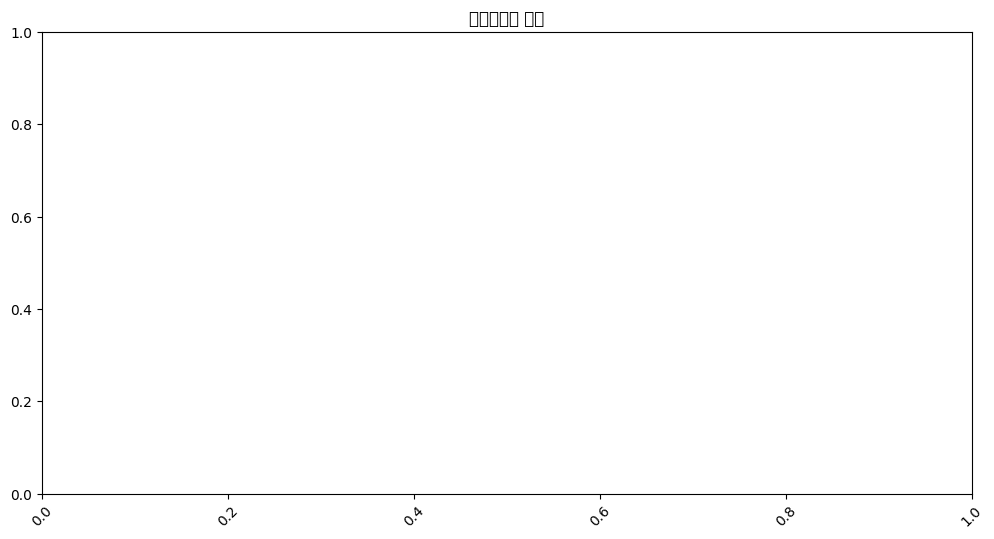

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

SERVICE_KEY = '/content/drive/MyDrive/API/seoul.txt'
URL = f'http://openapi.seoul.go.kr:8088/{SERVICE_KEY}/xml/tbLnOpendataRtmsV/1/100/'

req = requests.get(URL)
soup = BeautifulSoup(req.content, 'lxml')

sgg_nms = soup.find_all('sgg_nm')  # 자치구명

# 리스트 초기화
sgg_nm_list = []

for sgg_nm in sgg_nms:
    sgg_nm_list.append(sgg_nm.get_text())

# 데이터프레임 생성
df = pd.DataFrame({"자치구명": sgg_nm_list})

# 자치구명별 빈도수 계산
sgg_counts = df['자치구명'].value_counts()

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=sgg_counts.index, y=sgg_counts.values, palette='viridis')
plt.title('자치구명별 건수')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# 데이터프레임 일부 출력
print(df.head())

# 데이터프레임 정보 출력
print(df.info())


Empty DataFrame
Columns: [acc_year, sgg_cd, bldg_nm, obj_amt, house_type, rdealer_lawdnm, sgg_nm]
Index: []
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   acc_year        0 non-null      float64
 1   sgg_cd          0 non-null      float64
 2   bldg_nm         0 non-null      float64
 3   obj_amt         0 non-null      float64
 4   house_type      0 non-null      float64
 5   rdealer_lawdnm  0 non-null      float64
 6   sgg_nm          0 non-null      float64
dtypes: float64(7)
memory usage: 124.0 bytes
None


In [ ]:
# 'sgg_nm'을 찾도록 수정
sgg_nms = soup.find_all('sgg_nm')

# 데이터프레임 생성
df = pd.DataFrame({
    "acc_year": year_list,
    "sgg_cd": sgg_cd_list,
    "bldg_nm": bldg_nm_list,
    "obj_amt": obj_amt_list,
    "house_type": house_type_list,
    "rdealer_lawdnm": rdealer_lawdnm_list,
    "sgg_nm": [sgg_nm.get_text() for sgg_nm in sgg_nms]  # 수정된 부분
})


In [ ]:
df

,acc_year,sgg_cd,bldg_nm,obj_amt,house_type,rdealer_lawdnm


In [ ]:
!streamlit run 240201/api_crawling.py

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: 240201/api_crawling.py


In [5]:
import pandas as pd
import requests
import json
import folium


In [ ]:

URL = f'http://openapi.seoul.go.kr:8088/{SERVICE_KEY}/json/tbLnOpendataRtmsV/1/10/'


df_gu = pd.DataFrame(gu_list['SearchFAQOfGUListService']['row'])
df_gu

In [10]:
import requests
import xml.etree.ElementTree as ET

# API Key 파일 경로
API_key_path = '/content/drive/MyDrive/API/seoul.txt'

# API Key 읽기
with open(API_key_path, 'r') as key_file:
    API_key = key_file.read().strip()

# 서비스 이름
service = 'SearchFAQOfGUListService'

# API 호출 URL 구성
gu_url = f'http://openAPI.seoul.go.kr:8088/{API_key}/xml/{service}/1/5/'

# API 호출 및 결과 확인
response = requests.get(gu_url)

# XML 파싱
xml_data = ET.fromstring(response.text)

# 여기서부터는 XML 데이터를 적절히 다루어서 필요한 정보를 얻어내면 됩니다.
# 예를 들어, XML 데이터의 구조를 파악하여 필요한 정보를 추출할 수 있습니다.
print(xml_data)


<Element 'SearchFAQOfGUListService' at 0x7eb4fd8f4860>
